In [18]:
from biasbalancer.balancer import BiasBalancer
import numpy as np
import pandas as pd

In [19]:
#data = pd.read_csv('data/german_credit.csv')
#data['nn_pred'] = pred['nn_pred'].astype(int)
#data['nn_prob'] = pred['nn_prob']

In [24]:
pred = pd.read_csv('data/subset_fair.csv')
pred['classifications'] = pred['classifications'].astype(int)
#pred['actual'] = pred['actual'].astype(int)
pred

,person_id,credit_score,classifications,predictions,personal_status
0,0,1.0,0,0.009479,0
1,1,0.0,0,0.013127,1
2,2,0.0,0,0.005499,1
3,3,0.0,0,0.000412,0
4,4,0.0,0,0.244984,1
...,...,...,...,...,...
295,295,0.0,0,0.005367,0
296,296,1.0,0,0.323026,1
297,297,0.0,0,0.092197,1
298,298,0.0,0,0.236274,1


In [25]:
#data = pred["nn_prob"].to_numpy()
#normalized = (data-np.min(data)) / (np.max(data)-np.min(data))
#normalized
#pred["nn_prob"] = normalized

In [26]:
#normalized

In [27]:
german_w_fp = 0.9
fair_german = BiasBalancer(
    data = pred,
    y_name = "credit_score",
    y_hat_name = "classifications",
    a_name = "personal_status",
    r_name = "predictions",
    w_fp = german_w_fp,
    model_name='German Credit Scores')

c:\users\rune7\documents\github\fairness-oriented-interpretability-of-predictive-algorithms\src_biasbalancer\biasbalancer\balancer.py:363: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df)
c:\users\rune7\documents\github\fairness-oriented-interpretability-of-predictive-algorithms\src_biasbalancer\biasbalancer\balancer.py:363: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(tmp_df)


KeyError: 'TP'

In [6]:
level1_output_data = fair_german.level_1()

NameError: name 'fair_german' is not defined

In [41]:
level1_output_data

,grp,n,WMR,WMQ
0,married/previously_married,89,0.028714,0.000000
1,single,111,0.035035,22.013318


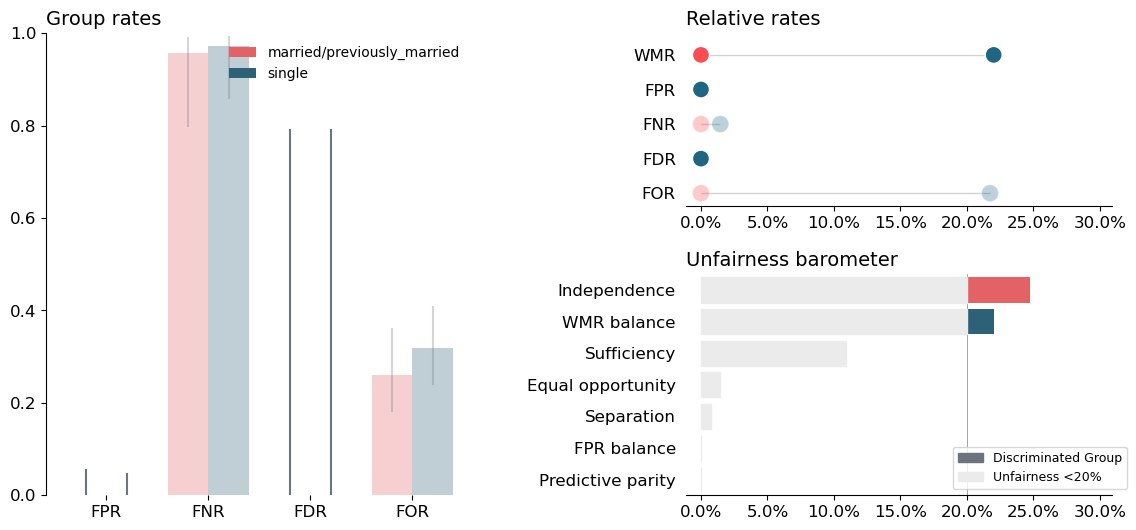

In [42]:
rates, relative_rates, barometer = fair_german.level_2()

In [35]:
barometer

,criterion,relative_rate,discriminated_grp
3,Predictive parity,192.307692,[married/previously_married]
1,FPR balance,130.769231,[married/previously_married]
5,Sufficiency,100.915751,[married/previously_married]
6,WMR balance,99.112951,[married/previously_married]
4,Separation,83.241758,[married/previously_married]
0,Equal opportunity,35.714286,[married/previously_married]
2,Independence,17.186417,[single]


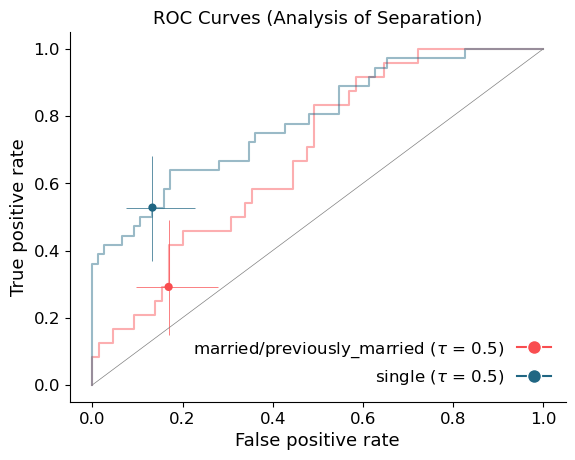

In [36]:
roc = fair_german.level_3(method = 'roc_curves')
